In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def addDF(files):
    df = pd.DataFrame(columns=['Time_x', 'Experiment_x', ' Hand Type_x', ' # hands_x', ' Position X_x',
       ' Position Y_x', ' Position Z_x', ' Velocity X_x', ' Velocity Y_x',
       ' Velocity Z_x', ' Pitch_x', ' Roll_x', ' Yaw_x', ' Wrist Pos X_x',
       ' Wrist Pos Y_x', ' Wrist Pos Z_x', ' Elbow pos X_x', ' Elbow Pos Y_x',
       ' Elbow Pos Z_x', ' Grab Strenth_x', ' Grab Angle_x',' Pinch Strength_x', 
       'Time_y', 'Experiment_y',
       ' Hand Type_y', ' # hands_y', ' Position X_y', ' Position Y_y',
       ' Position Z_y', ' Velocity X_y', ' Velocity Y_y', ' Velocity Z_y',
       ' Pitch_y', ' Roll_y', ' Yaw_y', ' Wrist Pos X_y', ' Wrist Pos Y_y',
       ' Wrist Pos Z_y', ' Elbow pos X_y', ' Elbow Pos Y_y', ' Elbow Pos Z_y',
       ' Grab Strenth_y', ' Grab Angle_y', ' Pinch Strength_y'])
    for file in files:
        f = pd.read_csv(file)
        f = f.ix[700:]
        f[" Hand Type"] = Series([1 if i == "right" else 2 for i in f[" Hand Type"]])
        if str.__contains__(file,"Alone"):  
            f.insert(loc=1, column = 'Experiment', value = "1")
            f = f.drop(' Frame ID',axis = 1)
            hr = pd.read_csv('HandRight.csv')
            hr[" Hand Type"] = Series([1 if i == "right" else 2 for i in hr[" Hand Type"]])
            hr.insert(loc = 1, column = 'Experiment', value = "1")
            hr = hr.iloc[:len(f)-1]
            hr = hr.reset_index(drop = True)
            hr = hr.drop(' Frame ID',axis = 1)
            f = f.reset_index(drop = True)
            f = pd.merge(f, hr, left_index = True, right_index = True)
        else:
            if str.__contains__(file,"Sync"):
                f.insert(loc = 1, column = 'Experiment', value = "2")
            if str.__contains__(file,"Spontan"):
                f.insert(loc = 1, column = 'Experiment', value = "3") 
            dfr = f[f[" Hand Type"] == 1]
            dfl = f[f[" Hand Type"] == 2]
            dfr.set_index(' Frame ID',inplace = True)
            dfl.set_index(' Frame ID',inplace = True)
            f = pd.merge(dfl, dfr, how = 'left',on = ' Frame ID') 
        df = pd.concat([df,f])
        
    df = df.drop(["Experiment_y"],axis = 1) 
    df = df.dropna()
    df = df[df.index%20 == 19]
    return df

In [3]:
import glob
test= addDF(glob.glob('C:\\Users\\97252\\Desktop\\Project\\finalWork\\UnityData\\Validation/**/*.csv', recursive=True))
train= addDF(glob.glob('C:\\Users\\97252\\Desktop\\Project\\finalWork\\UnityData\\Training/**/*.csv', recursive=True))
train.sort_index(inplace=True)
train.head()

,Time_x,Experiment_x,Hand Type_x,# hands_x,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,...,Yaw_y,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y
19,713.6092,1,2.0,1,-75.11210,175.8012,18.08475,-138.27550,376.5391,287.52980,...,-0.322404,51.12165,207.6456,84.47457,205.9005,51.10296,239.3952,0.0,0.720944,0.179294
19,399.5314,1,2.0,1,-181.48280,238.6269,-105.12690,-99.37661,146.5254,-30.79232,...,-0.322404,51.12165,207.6456,84.47457,205.9005,51.10296,239.3952,0.0,0.720944,0.179294
19,297.1636,1,2.0,1,-162.12160,233.1623,28.56842,-276.52920,336.7752,-92.33479,...,-0.322404,51.12165,207.6456,84.47457,205.9005,51.10296,239.3952,0.0,0.720944,0.179294
19,530.7222,1,2.0,1,-64.79945,287.3711,13.34173,-52.84441,213.8154,-12.43546,...,-0.322404,51.12165,207.6456,84.47457,205.9005,51.10296,239.3952,0.0,0.720944,0.179294
19,573.3708,1,2.0,1,-102.57790,206.1317,-11.69270,251.12630,-86.2178,70.73133,...,-0.322404,51.12165,207.6456,84.47457,205.9005,51.10296,239.3952,0.0,0.720944,0.179294


1 = Alone
2 = Sync
3 = Spontan


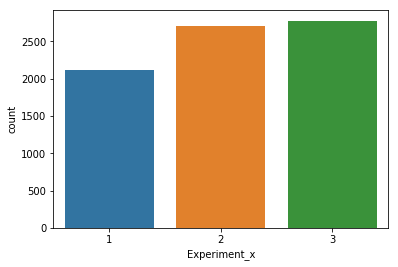

In [4]:
print ("1 = Alone")
print ("2 = Sync")
print ("3 = Spontan")
sns.countplot(data = train, x = 'Experiment_x')

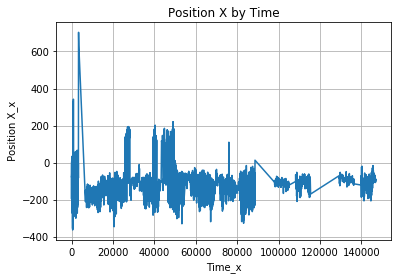

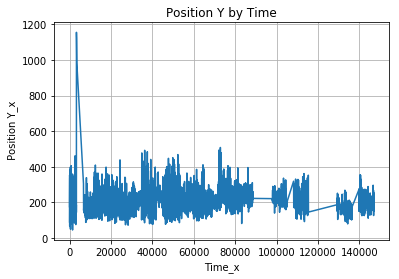

In [5]:
fig, ax = plt.subplots()
ax.plot(train[' Position X_x'])
ax.set(xlabel='Time_x', ylabel=' Position X_x',
       title='Position X by Time')
ax.grid()
fig.savefig("test.png")
plt.show()

fig, ax = plt.subplots()
ax.plot(train[' Position Y_x'])
ax.set(xlabel='Time_x', ylabel=' Position Y_x',
       title='Position Y by Time')
ax.grid()
fig.savefig("test.png")
plt.show()

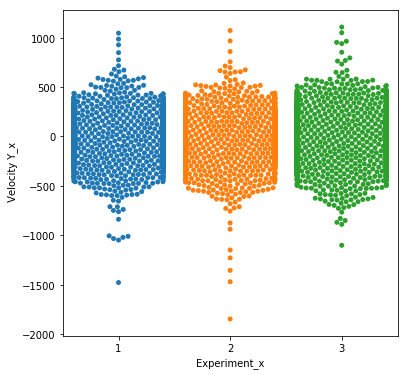

In [7]:
plt.figure (figsize=(6,6))
sns.swarmplot(x="Experiment_x", y=" Velocity Y_x", data = train)
plt.show()

In [8]:
X_train=train[['Time_x', ' Hand Type_x', ' Position X_x',
       ' Position Y_x', ' Position Z_x', ' Velocity X_x', ' Velocity Y_x',
       ' Velocity Z_x', ' Pitch_x', ' Roll_x', ' Yaw_x', ' Wrist Pos X_x',
       ' Wrist Pos Y_x', ' Wrist Pos Z_x', ' Elbow pos X_x', ' Elbow Pos Y_x',
       ' Elbow Pos Z_x', ' Grab Strenth_x', ' Grab Angle_x',
       ' Pinch Strength_x', 'Time_y', ' Hand Type_y',
       ' Position X_y', ' Position Y_y', ' Position Z_y',
       ' Velocity X_y', ' Velocity Y_y', ' Velocity Z_y', ' Pitch_y',
       ' Roll_y', ' Yaw_y', ' Wrist Pos X_y', ' Wrist Pos Y_y',
       ' Wrist Pos Z_y', ' Elbow pos X_y', ' Elbow Pos Y_y', ' Elbow Pos Z_y',
       ' Grab Strenth_y', ' Grab Angle_y', ' Pinch Strength_y']]
y_train=train['Experiment_x']
X_test=test[['Time_x', ' Hand Type_x', ' Position X_x',
       ' Position Y_x', ' Position Z_x', ' Velocity X_x', ' Velocity Y_x',
       ' Velocity Z_x', ' Pitch_x', ' Roll_x', ' Yaw_x', ' Wrist Pos X_x',
       ' Wrist Pos Y_x', ' Wrist Pos Z_x', ' Elbow pos X_x', ' Elbow Pos Y_x',
       ' Elbow Pos Z_x', ' Grab Strenth_x', ' Grab Angle_x',
       ' Pinch Strength_x', 'Time_y', ' Hand Type_y',
       ' Position X_y', ' Position Y_y', ' Position Z_y',
       ' Velocity X_y', ' Velocity Y_y', ' Velocity Z_y', ' Pitch_y',
       ' Roll_y', ' Yaw_y', ' Wrist Pos X_y', ' Wrist Pos Y_y',
       ' Wrist Pos Z_y', ' Elbow pos X_y', ' Elbow Pos Y_y', ' Elbow Pos Z_y',
       ' Grab Strenth_y', ' Grab Angle_y', ' Pinch Strength_y']]
y_test=test['Experiment_x']
print("Training FeatureSet:", X_train.shape)
print("Training Labels:", y_train.shape)
print("Testing FeatureSet:", X_test.shape)
print("Testing Labels:", y_test.shape)

Training FeatureSet: (7593, 40)
Training Labels: (7593,)
Testing FeatureSet: (1995, 40)
Testing Labels: (1995,)


In [9]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)
print("test score:",LR.score(X_test,y_test))
print("train score:",LR.score(X_train,y_train))

test score: 0.825563909774436
train score: 0.8600026340050047


In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 40)
X_t_train = pca.fit_transform (X_train)
X_t_test = pca.fit_transform (X_test)
LR.fit(X_t_train, y_train)
print ("Score from the PCA")
print ("test score : ", LR.score(X_t_test, y_test))
print ("train score : ", LR.score(X_t_train, y_train))

Score from the PCA
test score :  0.4581453634085213
train score :  0.8588173317529303


In [11]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components = 10, random_state = 1)
X_t_train = ica.fit_transform (X_train)
X_t_test = ica.fit_transform (X_test)
LR.fit(X_t_train, y_train)
print ("Score from the ICA")
print ("test score : ", LR.score(X_t_test, y_test))
print ("train score : ", LR.score(X_t_train, y_train))

Score from the ICA
test score :  0.2837092731829574
train score :  0.7142104569998683


In [12]:
#ADABOOST
from sklearn.ensemble import AdaBoostClassifier
ABC = AdaBoostClassifier(n_estimators=59)
ABC = ABC.fit(X_train,y_train)
print("test score:", ABC.score(X_test,y_test))
print("train score:", ABC.score(X_train,y_train))

test score: 0.7172932330827068
train score: 0.7780850783616489


In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
X_t_train = pca.fit_transform (X_train)
X_t_test = pca.fit_transform (X_test)
ABC.fit(X_t_train, y_train)
print ("Score from the PCA")
print ("test score : ", ABC.score(X_t_test, y_test))
print ("train score : ", ABC.score(X_t_train, y_train))

Score from the PCA
test score :  0.6441102756892231
train score :  0.752930330567628


In [14]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components = 10, random_state = 1)
X_t_train = ica.fit_transform (X_train)
X_t_test = ica.fit_transform (X_test)
ABC.fit(X_t_train, y_train)
print ("Score from the ICA")
print ("test score : ", ABC.score(X_t_test, y_test))
print ("train score : ", ABC.score(X_t_train, y_train))

Score from the ICA
test score :  0.36390977443609024
train score :  0.7376531015408929


In [15]:
#NAIVEBASE
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB = GNB.fit(X_train,y_train)
print("test score:", GNB.score(X_test,y_test))
print("train score:", GNB.score(X_train,y_train))

test score: 0.8040100250626566
train score: 0.8187804556828658


In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 40)
X_t_train = pca.fit_transform (X_train)
X_t_test = pca.fit_transform (X_test)
GNB.fit(X_t_train, y_train)
print ("Score from the PCA")
print ("test score : ", GNB.score(X_t_test, y_test))
print ("train score : ", GNB.score(X_t_train, y_train))

Score from the PCA
test score :  0.46616541353383456
train score :  0.7796654813644146


In [17]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components = 40, random_state = 1)
X_t_train = ica.fit_transform (X_train)
X_t_test = ica.fit_transform (X_test)
GNB.fit(X_t_train, y_train)
print ("Score from the ICA")
print ("test score : ", GNB.score(X_t_test, y_test))
print ("train score : ", GNB.score(X_t_train, y_train))

Score from the ICA
test score :  0.28922305764411027
train score :  0.7483208218095614


C:\Users\97252\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
